**Titanic Dataset**

In [1]:
from IPython.display import HTML
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=true;
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide Code"></form>''')

In [2]:
import os
print(os.listdir("../input"))

['train.csv', 'gender_submission.csv', 'test.csv']


**Preprocessing**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../input/train.csv")
df.Sex[df.Sex == 'male'] = 0
df.Sex[df.Sex == 'female'] = 1
df.Embarked[df.Embarked == 'S'] = 0
df.Embarked[df.Embarked == 'C'] = 1
df.Embarked[df.Embarked == 'Q'] = 2

df2 = pd.read_csv("../input/test.csv")
df2.Sex[df2.Sex == 'male'] = 0
df2.Sex[df2.Sex == 'female'] = 1
df2.Embarked[df2.Embarked == 'S'] = 0
df2.Embarked[df2.Embarked == 'C'] = 1
df2.Embarked[df2.Embarked == 'Q'] = 2

#df = df.drop('Unnamed: 0', axis=1)
print(df.head())
print(df.shape)
print(df.columns)

   PassengerId  Survived  Pclass    ...        Fare Cabin  Embarked
0            1         0       3    ...      7.2500   NaN         0
1            2         1       1    ...     71.2833   C85         1
2            3         1       3    ...      7.9250   NaN         0
3            4         1       1    ...     53.1000  C123         0
4            5         0       3    ...      8.0500   NaN         0

[5 rows x 12 columns]
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column_name': df.columns,
                               'percent_missing': percent_missing})
missing_values

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.000000


In [6]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_values = pd.DataFrame({'column_name': df2.columns,
                               'percent_missing': percent_missing})
missing_values

,column_name,percent_missing
PassengerId,PassengerId,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
Age,Age,20.574163
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Ticket,Ticket,0.000000
Fare,Fare,0.239234
Cabin,Cabin,78.229665


In [7]:
df = df.fillna(0)
df2 = df2.fillna(0)

**Data Visualization**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

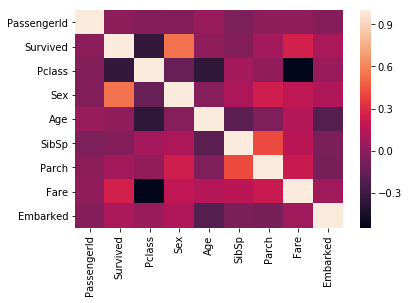

In [9]:
import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Machine Learning**

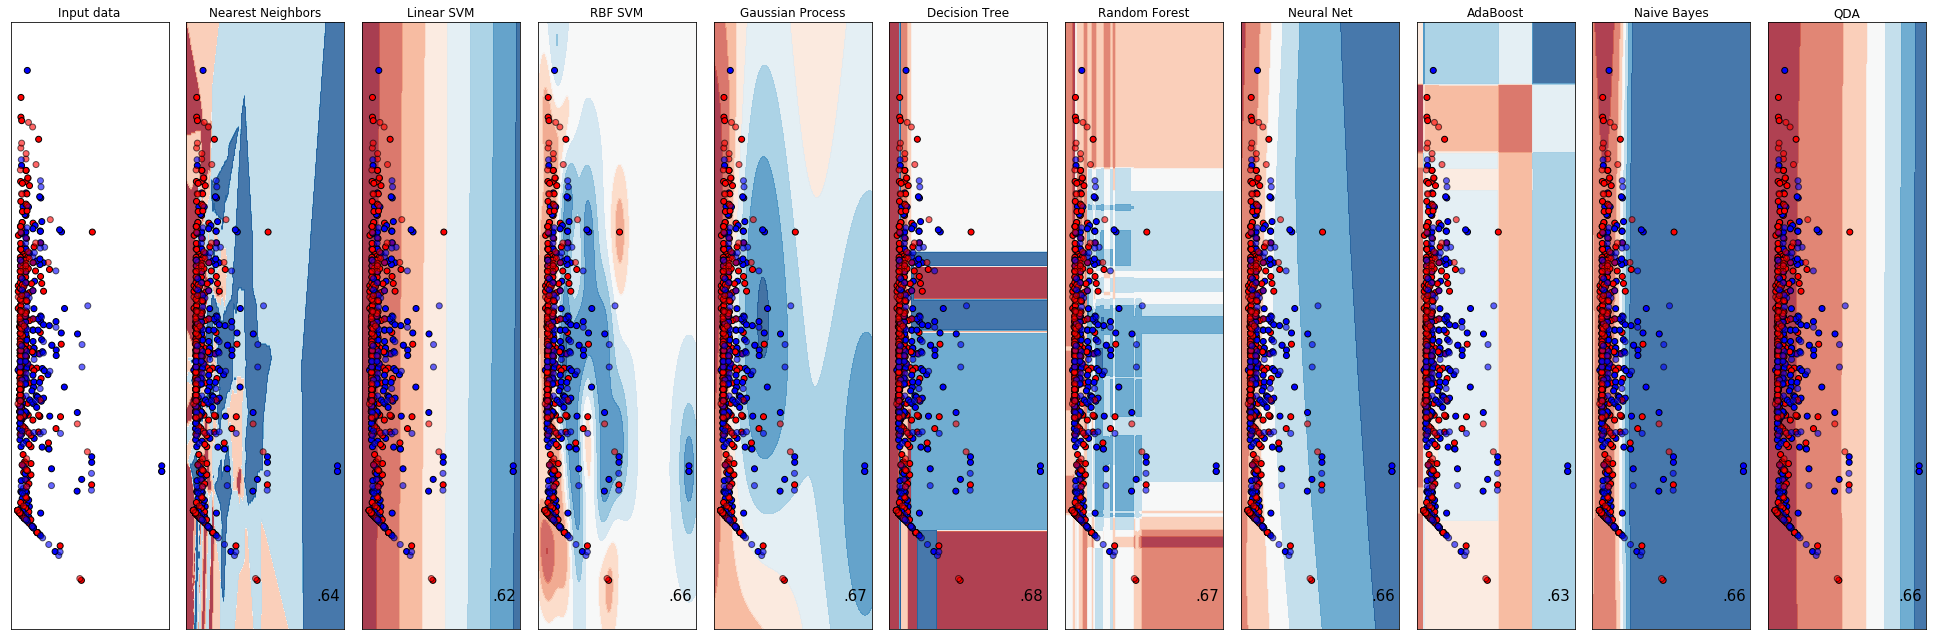

In [10]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1).values
pca = PCA(n_components=2,svd_solver='full')
X = pca.fit_transform(X)
y = df['Survived']


# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)

datasets = [df]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    #X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_Train = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
Y_Train = df['Survived']

X_Train = StandardScaler().fit_transform(X_Train)

X_Test = df2.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
X_Test = StandardScaler().fit_transform(X_Test)

# X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


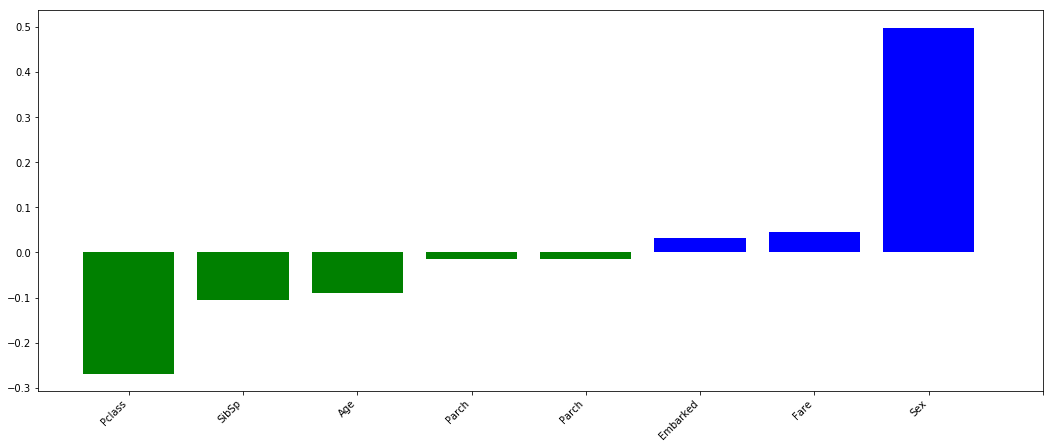

In [12]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1).columns.values)

trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
feature_plot(trainedsvm, df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1).columns.values)

In [13]:
# Preprocessing :
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from itertools import product

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Logistic Regression

In [14]:
trainedmodel = LogisticRegression().fit(X_Train,Y_Train)
predictions =trainedmodel.predict(X_Test)
# print(confusion_matrix(Y_Test,predictions))
# print(classification_report(Y_Test,predictions))
trainedmodel.score(X_Train, Y_Train)

0.7934904601571269

Random Forest

In [15]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
trainedforest.score(X_Train, Y_Train)

0.9820426487093153

In [16]:
submission = pd.DataFrame({
        "PassengerId": df2["PassengerId"],
        "Survived": predictionforest
    })
submission.to_csv('titanic.csv', index=False)

Support Vector Machines

In [17]:
trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
predictionsvm = trainedsvm.predict(X_Test)
trainedsvm.score(X_Train, Y_Train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7901234567901234

Decision Tree

In [18]:
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
predictionstree = trainedtree.predict(X_Test)
trainedtree.score(X_Train, Y_Train)

0.9820426487093153

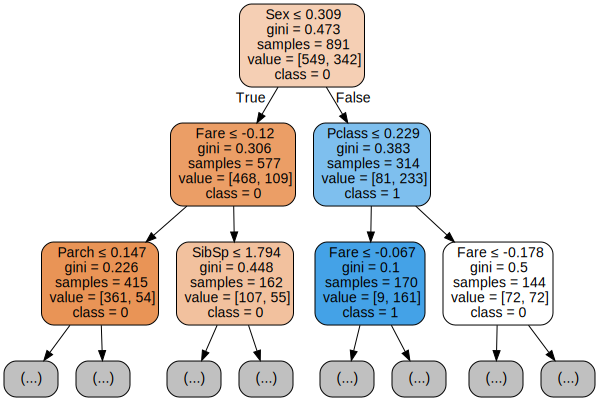

In [19]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names=df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], 
                       axis=1).columns,
                       class_names=['0', '1'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

Linear Discriminant Anaylsis

In [20]:
trainedlda = LinearDiscriminantAnalysis().fit(X_Train, Y_Train)
predictionlda = trainedlda.predict(X_Test)
trainedlda.score(X_Train, Y_Train)

0.7890011223344556

Naive Bayes

In [21]:
trainednb = GaussianNB().fit(X_Train, Y_Train)
predictionnb = trainednb.predict(X_Test)
trainednb.score(X_Train, Y_Train)

0.7912457912457912

XGBoost

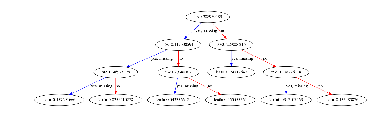

<Figure size 3600x3960 with 0 Axes>

In [22]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()

# Train
model.fit(X_Train, Y_Train)

plot_tree(model)
plt.figure(figsize = (50,55))
plt.show()

**Feature Engineering**

Principal Component Analysis

In [23]:
pca = PCA(n_components=2,svd_solver='full')
# print(pca.explained_variance_)

X_Train = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
Y_Train = df['Survived']

X_Train = StandardScaler().fit_transform(X_Train)
X_Train1 = pca.fit_transform(X_Train)

X_Test = df2.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
X_Test = StandardScaler().fit_transform(X_Test)
X_Test1 = pca.fit_transform(X_Train)

trainednb = GaussianNB().fit(X_Train1, Y_Train)
trainedsvm = svm.LinearSVC().fit(X_Train1, Y_Train)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train1,Y_Train)
trainedmodel = LogisticRegression().fit(X_Train1,Y_Train)

print('Naive Bayes')
predictionnb = trainednb.predict(X_Test1)
print(trainednb.score(X_Train1, Y_Train))

print('SVM')
predictionsvm = trainedsvm.predict(X_Test1)
print(trainedsvm.score(X_Train1, Y_Train))

print('Random Forest')
predictionforest = trainedforest.predict(X_Test1)
print(trainedforest.score(X_Train1, Y_Train))

print('Logistic Regression')
predictions =trainedmodel.predict(X_Test1)
print(trainedmodel.score(X_Train1, Y_Train))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of

Naive Bayes
0.7205387205387206
SVM
0.6902356902356902
Random Forest
0.9820426487093153
Logistic Regression
0.6879910213243546


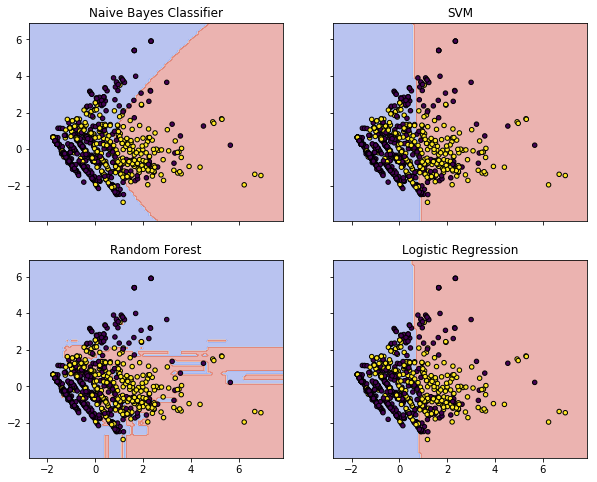

In [24]:
# Thanks to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

x_min, x_max = X_Train1[:, 0].min() - 1, X_Train1[:, 0].max() + 1
y_min, y_max = X_Train1[:, 1].min() - 1, X_Train1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [trainednb, trainedsvm, trainedforest, trainedmodel],
                        ['Naive Bayes Classifier', 'SVM',
                         'Random Forest', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    axarr[idx[0], idx[1]].contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_Train1[:, 0], X_Train1[:, 1], c=Y_Train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

t-SNE

In [25]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_Train)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 891 samples in 0.002s...
[t-SNE] Computed neighbors for 891 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 0.298435
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.797741
[t-SNE] KL divergence after 300 iterations: 0.390099
t-SNE done! Time elapsed: 2.1289355754852295 seconds


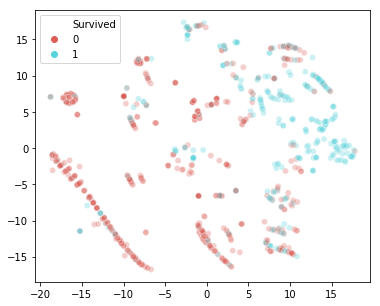

In [26]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=Y_Train,
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

****Deep Learning****

In [27]:
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)

In [28]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization, Activation

#Y_Test = to_categorical(Y_Test)

input_dim = X_Train.shape[1]
nb_classes = Y_Train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print("Training...")
model.fit(X_Train, Y_Train, nb_epoch=50, batch_size=16, validation_split=0.1, verbose=80)

preds = model.predict_classes(X_Test, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Training...
Instructions for updating:
Use tf.cast instead.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 801 samples, validate on 90 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [29]:
scores = model.evaluate(X_Train, Y_Train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 41us/step
acc: 85.97%
